In [2]:
import pandas as pd
import numpy as np

# uPiB1 = '/data/amciilab/processedDataset/AIBL/AIBL-PUP/results/PiB_IDS_SUVR.csv'
# uPiB2 = '/data/amciilab/processedDataset/OASIS/Oasis-PUP/results/PiB_IDS_SUVR.csv'
uPiB1 = './data_PET/AIBL_PIB_PUP.xlsx'
uPiB2 = './data_PET/OASIS_PIB_PUP.xlsx'
uFBP = './data_PET/ALL-AV45-PUP-BAI-SUVR-11162023.xlsx'

pPiB = '/data/amciilab/processedDataset/Centiloid/FBP_PIB/PUP_PIB/runExtract/list_id_SUVR.csv'
pFBP = '/data/amciilab/processedDataset/Centiloid/FBP_PIB/PUP_FBP/runExtract/list_id_SUVR.csv'

In [3]:
# uPiB1_raw = pd.read_csv(uPiB1)
# uPiB2_raw = pd.read_csv(uPiB2)
uPiB1_raw = pd.read_excel(uPiB1, sheet_name='AIBL_PIB_PUP')
uPiB1_CL = pd.read_excel(uPiB1, sheet_name='Sheet1')
uPiB2_raw = pd.read_excel(uPiB2, sheet_name='OASIS_PIB_PUP')
uPiB2_CL = pd.read_excel(uPiB2, sheet_name='Summary')

uFBP_raw = pd.read_excel(uFBP, sheet_name='ALL_AV45_PUP_BAI_SUVR')
uFBP_CL = pd.read_excel(uFBP, sheet_name='Demo')

pPiB_raw = pd.read_csv(pPiB)
pFBP_raw = pd.read_csv(pFBP)



In [4]:
# baseline selection for uPiB2
sorted_uPiB2_raw = uPiB2_raw.sort_values(by='ID')
sorted_uPiB2_raw['ID_prefix'] = uPiB2_raw['ID'].str.extract(r'^(OAS\d+_PIB)')
sorted_uPiB2_raw = sorted_uPiB2_raw.drop_duplicates(subset='ID_prefix', keep='first')
uPiB2_raw_baseline = sorted_uPiB2_raw.drop(columns=['ID_prefix'])

# baseline selection for uPiB1
uPiB1_raw_baseline = uPiB1_raw[uPiB1_raw['ID'].str.endswith('bl')]

# baseline selection for uFBP
sorted_uFBP_raw = uFBP_raw.sort_values(by=['RID', 'Actual Date'])
uFBP_raw_baseline = sorted_uFBP_raw.drop_duplicates(subset='RID', keep='first')

uFBP_CL_baseline = uFBP_CL[uFBP_CL['PUP ID'].isin(uFBP_raw_baseline['PUP ID'])]['CL']
uPiB1_CL_baseline = uPiB1_CL[uPiB1_CL['SID'].isin(uPiB1_raw_baseline['ID'])]
uPiB2_CL_baseline = uPiB2_CL[uPiB2_CL['PIB_ID'].isin(uPiB2_raw_baseline['ID'])]
uPiB_CL_baseline = pd.concat([uPiB1_CL_baseline, uPiB2_CL_baseline])['CL']

uPiB_CL_baseline = uPiB_CL_baseline.to_numpy()
uFBP_CL_baseline = uFBP_CL_baseline.to_numpy()


len(uFBP_CL_baseline)==len(uFBP_raw_baseline), len(uPiB1_CL_baseline)==len(uPiB1_raw_baseline), len(uPiB2_CL_baseline)==len(uPiB2_raw_baseline)

(True, True, True)

In [2]:
import torch
a = torch.zeros(1, 2)
a.view(-1).shape

torch.Size([2])

In [7]:
uFBP_raw_baseline.shape

(1273, 99)

In [32]:
uPiB1_raw.head()

,ID,Cerebellum-White-Matter,Cerebellum-Cortex,Thalamus,Caudate,Putamen,Pallidum,Hippocampus,Amygdala,Accumbens-area,...,wm-supramarginal,wm-frontalpole,wm-temporalpole,wm-transversetemporal,wm-insula,GR_FS,TEMP_FS,OCC_FS,PREF_FS,MC
0,1000bl,1.5816,1,1.3235,1.1720,1.3318,1.5566,1.2602,1.1144,1.1085,...,1.4459,1.1049,1.2084,1.4874,1.5208,1.1415,1.0133,1.1495,0.9997,1.0767
1,1001bl,1.5506,1,1.2421,1.0750,1.2889,1.4337,1.2227,1.1300,1.0446,...,1.3559,1.1743,1.1816,1.4261,1.4216,1.1115,0.9915,1.1577,1.0280,1.0631
2,100bl,1.5580,1,1.8519,1.7563,2.4554,2.2122,1.3036,1.4101,2.2522,...,1.9834,2.5100,1.6228,1.8850,1.9256,2.0997,1.7661,1.5471,2.0907,2.0407
3,1013m18,1.3803,1,1.4159,1.0849,1.7414,1.6678,1.2940,1.2795,1.4879,...,1.6730,1.9128,1.5580,1.5426,1.7059,1.8993,1.5816,1.4299,1.6852,1.7902
4,1013m36,1.3951,1,1.4691,1.1382,1.8002,1.7524,1.3029,1.3462,1.6937,...,1.7944,2.0070,1.6489,1.5680,1.7650,2.0514,1.6662,1.5618,1.8607,1.9464


In [33]:
uPiB2_raw.head()

,ID,Cerebellum-White-Matter,Cerebellum-Cortex,Thalamus,Caudate,Putamen,Pallidum,Hippocampus,Amygdala,Accumbens-area,...,wm-supramarginal,wm-frontalpole,wm-temporalpole,wm-transversetemporal,wm-insula,GR_FS,TEMP_FS,OCC_FS,PREF_FS,MC
0,OAS30001_PIB_d0423,1.6868,1,1.4876,1.3480,1.4205,1.6981,1.3160,1.2419,1.2179,...,1.5598,1.1383,1.1596,1.6206,1.6343,1.1292,1.1039,1.1219,1.0669,1.1246
1,OAS30001_PIB_d0847,1.7166,1,1.5282,1.3201,1.4674,1.8577,1.4132,1.2550,1.2440,...,1.6816,1.0959,1.2594,1.6485,1.7479,1.1983,1.0853,1.1929,1.1253,1.1564
2,OAS30001_PIB_d2438,1.6565,1,1.4759,1.2655,1.4944,1.8405,1.3532,1.2903,1.1577,...,1.5393,1.1214,1.3503,1.6164,1.6626,1.1661,1.0925,1.1531,1.0801,1.1379
3,OAS30001_PIB_d3132,1.7112,1,1.5430,1.2775,1.5115,1.7940,1.2968,1.2326,1.1642,...,1.5403,1.0659,1.2362,1.6237,1.6393,1.1342,1.0716,1.1306,1.1101,1.1337
4,OAS30001_PIB_d4467,1.7628,1,1.5975,1.3816,1.5958,1.8879,1.3857,1.2554,1.2831,...,1.6513,1.1354,1.3140,1.7353,1.7524,1.2326,1.1581,1.1762,1.1498,1.2017


In [34]:
uFBP_raw.head()

,PUP ID,Cerebellum-White-Matter,Cerebellum-Cortex,Thalamus,Caudate,Putamen,Pallidum,Hippocampus,Amygdala,Accumbens-area,...,wm-insula,GR_FS,TEMP_FS,OCC_FS,PREF_FS,MC,RID,Actual Date,AV-45_VC,Inum2
0,FBP011S0021L100810N4,1.5874,1,1.3770,1.3053,1.3854,1.5612,1.1878,1.0537,1.0927,...,1.7269,1.2086,1.1078,1.1249,1.2128,1.1684,21,2010-10-08,m60,196545
1,FBP011S0021L100312N4,1.7833,1,1.4785,1.3619,1.4695,1.6331,1.2625,1.1349,1.1439,...,1.9564,1.2319,1.1533,1.1048,1.1732,1.1889,21,2012-10-03,v11,338513
2,FBP011S0021L110515N4,1.6764,1,1.3276,1.2342,1.3635,1.5669,1.1812,1.0227,1.0301,...,1.6984,1.1340,1.0872,1.0513,1.0653,1.1021,21,2015-11-05,v41,557332
3,FBP011S0021L112817N4,1.7487,1,1.4738,1.4378,1.5119,1.7030,1.3191,1.1862,1.1375,...,1.9265,1.2642,1.2025,1.1416,1.1978,1.2243,21,2017-11-28,init,943942
4,FBP011S0023L122110N4,1.8655,1,1.5917,1.5421,1.7017,2.0640,1.5644,1.3730,1.3058,...,2.0396,1.3311,1.2177,1.3765,1.3563,1.3805,23,2010-12-21,m60,209635


In [35]:
pPiB_raw.head()

,ID,Cerebellum-White-Matter,Cerebellum-Cortex,Thalamus,Caudate,Putamen,Pallidum,Hippocampus,Amygdala,Accumbens-area,...,wm-supramarginal,wm-frontalpole,wm-temporalpole,wm-transversetemporal,wm-insula,GR_FS,TEMP_FS,OCC_FS,PREF_FS,MC
0,Eld_105858,1.7398,1.0,1.9285,2.1233,2.9834,2.5521,1.6681,1.8025,2.7117,...,2.7154,3.2785,2.1344,2.6769,2.5695,2.8507,2.1026,1.5128,2.7265,2.6226
1,Eld_106843,1.5907,1.0,1.5352,1.1917,1.4382,1.6747,1.2727,1.1856,1.0790,...,1.6437,1.2194,1.3059,1.4105,1.5687,1.1711,1.1671,1.1760,1.1238,1.2235
2,Eld_123723,1.5900,1.0,1.2975,1.1676,1.3016,1.6335,1.1197,1.1060,1.1412,...,1.3564,1.1380,1.1201,1.2924,1.4402,1.0469,0.9920,1.0775,0.9658,1.0160
3,Eld_123950,1.9807,1.0,1.7291,1.8213,2.0001,2.1571,1.5355,1.5182,2.2812,...,2.1370,2.5995,1.6171,2.0075,2.1789,2.2242,1.4551,1.3588,1.8727,1.8827
4,Eld_130779,1.6498,1.0,1.5449,1.1763,1.5022,1.8262,1.1424,1.1525,1.1116,...,1.5990,1.0659,1.2565,1.4424,1.6989,1.0914,1.1160,1.0718,1.0579,1.1148


In [36]:
# select first 90 columns
uPiB1_df = uPiB1_raw.iloc[:, 1:90]
uPiB2_df = uPiB2_raw.iloc[:, 1:90]
uFBP_df = uFBP_raw.iloc[:, 1:90]
pPiB_df = pPiB_raw.iloc[:, 1:90]
pFBP_df = pFBP_raw.iloc[:, 1:90]


In [37]:
# merge uPiB1 and uPiB2
uPiB_df = pd.concat([uPiB1_df, uPiB2_df], axis=0)
uPiB_CL = pd.concat([uPiB1_CL, uPiB2_CL], axis=0)['CL']
uFBP_CL = uFBP_CL['CL']

In [38]:
# alignment check
for i, j in zip(list(uPiB_df.columns), list(uFBP_df.columns)):
    if i != j:
        print(i, j)
        
# should print nothing

In [39]:
uPiB_df.shape, uFBP_df.shape, pPiB_df.shape, pFBP_df.shape, uPiB_CL.shape, uFBP_CL.shape

((1957, 89), (2717, 89), (46, 89), (46, 89), (1957,), (2717,))

In [40]:
# check if the columns are all 1 or 0
names = []
for i, name in enumerate(pPiB_df.columns):
    if len(uPiB_df[name].unique()) == 1:
        print(i, name) 
        names.append(name)

1 Cerebellum-Cortex
9 Substancia-Nigra
21 ctx-corpuscallosum
57 wm-corpuscallosum


In [41]:
# remove columns with all 0 or 1

uPiB_df = uPiB_df.drop(columns=names)
uFBP_df = uFBP_df.drop(columns=names)
pPiB_df = pPiB_df.drop(columns=names)
pFBP_df = pFBP_df.drop(columns=names)

uPiB_df.shape, uFBP_df.shape, pPiB_df.shape, pFBP_df.shape

((1957, 85), (2717, 85), (46, 85), (46, 85))

In [42]:
uPiB = uPiB_df.to_numpy().astype(np.float32)
uFBP = uFBP_df.to_numpy().astype(np.float32)
pPiB = pPiB_df.to_numpy().astype(np.float32)
pFBP = pFBP_df.to_numpy().astype(np.float32)

uPiB_CL = uPiB_CL.to_numpy().astype(np.float32)
uFBP_CL = uFBP_CL.to_numpy().astype(np.float32)

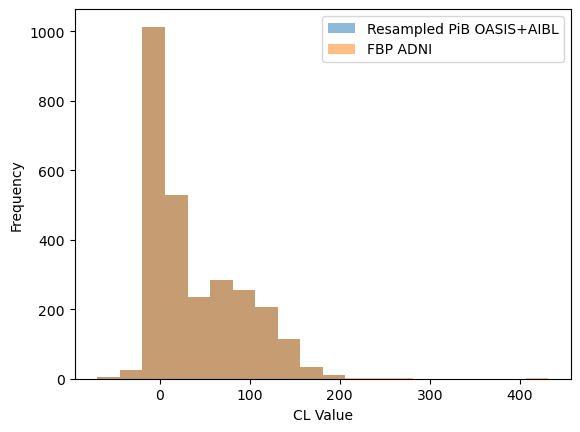

In [57]:
import matplotlib.pyplot as plt
import numpy as np
# Calculate histograms
# bins = np.histogram_bin_edges(np.concatenate([uPiB_CL, uFBP_CL]), bins='auto')
# make bin size smaller
bins = np.histogram_bin_edges(np.concatenate([uPiB_CL, uFBP_CL]), bins=20)
hist1, bin_edges1 = np.histogram(uPiB_CL, bins=bins)
hist2, bin_edges2 = np.histogram(uFBP_CL, bins=bins)


# resample for matching the distribution
def distribution_matching(sequence1, sequence2, hist1, hist2, bin_edges):
    resampled_sequence1 = []
    resampled_indices1 = []
    resampled_sequence2 = []
    resampled_indices2 = []
    for count1, count2, (start, end) in zip(hist1, hist2, zip(bin_edges[:-1], bin_edges[1:])):
        if count1 > 0 and count2 > 0:
            bin_indices1 = np.where((sequence1 >= start) & (sequence1 < end))[0]
            bin_indices2 = np.where((sequence2 >= start) & (sequence2 < end))[0]
            if count1 > count2:
                indices = np.random.choice(bin_indices2, count1-count2, replace=True)
                resampled_sequence2.extend(sequence2[indices])
                resampled_indices2.extend(indices)
            elif count2 > count1:
                indices = np.random.choice(bin_indices1, count2-count1, replace=True)
                resampled_sequence1.extend(sequence1[indices])
                resampled_indices1.extend(indices)
    return np.array(resampled_indices1), np.array(resampled_indices2)

# resample 500 for each bin
def resample_to_n(sequence1, sequence2, hist1, hist2, bin_edges, n):
    resampled_sequence1 = []
    resampled_indices1 = []
    resampled_sequence2 = []
    resampled_indices2 = []
    for count1, count2, (start, end) in zip(hist1, hist2, zip(bin_edges[:-1], bin_edges[1:])):
        if count1 > 0 and count2 > 0:
            bin_indices1 = np.where((sequence1 >= start) & (sequence1 < end))[0]
            bin_indices2 = np.where((sequence2 >= start) & (sequence2 < end))[0]
            
            indices = np.random.choice(bin_indices2, n, replace=True)
            resampled_sequence2.extend(sequence2[indices])
            resampled_indices2.extend(indices)
        
            indices = np.random.choice(bin_indices1, n, replace=True)
            resampled_sequence1.extend(sequence1[indices])
            resampled_indices1.extend(indices)
    return np.array(resampled_indices1), np.array(resampled_indices2)



idx_PiB, idx_FBP = distribution_matching(uPiB_CL, uFBP_CL, hist1, hist2, bin_edges1)
uPiB_CL_resampled = uPiB_CL[idx_PiB]
uPiB_resampled = np.concatenate([uPiB_CL, uPiB_CL_resampled], axis=0)
if len(idx_FBP) > 0:
    uFBP_CL_resampled = uFBP_CL[idx_FBP]
    uFBP_resampled = np.concatenate([uFBP_CL, uFBP_CL_resampled], axis=0)
else:
    uFBP_resampled = uFBP_CL


# idx_PiB, idx_FBP = resample_to_n(uPiB_CL, uFBP_CL, hist1, hist2, bin_edges1, 500)
# uPiB_CL_resampled = uPiB_CL[idx_PiB]
# uFBP_CL_resampled = uFBP_CL[idx_FBP]

# # Plot the resampled histograms
plt.hist(uPiB_resampled, bins=bins, alpha=0.5, label='Resampled PiB OASIS+AIBL')
plt.hist(uFBP_resampled, bins=bins, alpha=0.5, label='FBP ADNI')
plt.xlabel('CL Value')
plt.ylabel('Frequency')
plt.legend()
# plt.savefig('CL_resampled.png')

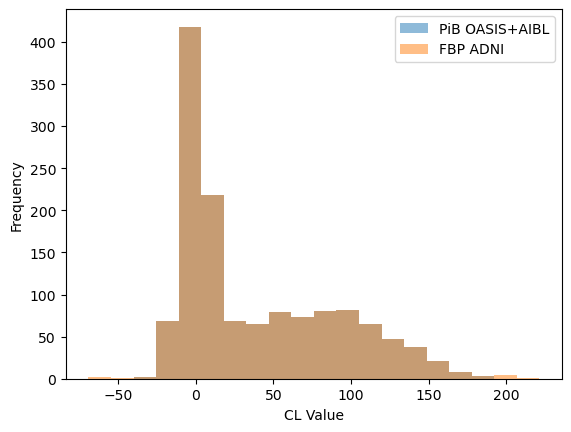

In [68]:
bins = np.histogram_bin_edges(np.concatenate([uPiB_CL_baseline, uFBP_CL_baseline]), bins=20)
hist1, bin_edges1 = np.histogram(uPiB_CL_baseline, bins=bins)
hist2, bin_edges2 = np.histogram(uFBP_CL_baseline, bins=bins)

idx_PiB, idx_FBP = distribution_matching(uPiB_CL_baseline, uFBP_CL_baseline, hist1, hist2, bin_edges1)
uPiB_CL_resampled = uPiB_CL_baseline[idx_PiB]
uPiB_resampled = np.concatenate([uPiB_CL_baseline, uPiB_CL_resampled], axis=0)

if len(idx_FBP) > 0:
    uFBP_CL_resampled = uFBP_CL_baseline[idx_FBP]
    uFBP_resampled = np.concatenate([uFBP_CL_baseline, uFBP_CL_resampled], axis=0)
else:
    uFBP_resampled = uFBP_CL

plt.hist(uPiB_resampled, alpha=0.5, bins=bins, label='PiB OASIS+AIBL')
plt.hist(uFBP_resampled, alpha=0.5, bins=bins, label='FBP ADNI')
plt.xlabel('CL Value')
plt.ylabel('Frequency')
plt.legend()
# plt.savefig('CL.png')

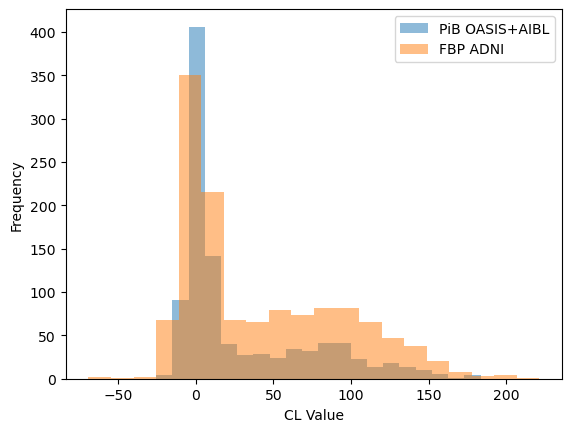

In [67]:
import matplotlib.pyplot as plt
plt.hist(uPiB_CL_baseline, alpha=0.5, bins=20, label='PiB OASIS+AIBL')
plt.hist(uFBP_CL_baseline, alpha=0.5, bins=20, label='FBP ADNI')
plt.xlabel('CL Value')
plt.ylabel('Frequency')
plt.legend()

In [16]:
import torch
# fake A
# fake_PiB = torch.load('./training_logs2/training_128_256_8_4_1/fake_B_28800_Best.pt')
fake_PiB = torch.load('./training_logs4/data/128_256_4_8_1/fake_B_Best.pt')
fake_PiB = fake_PiB.cpu().detach().numpy()
fake_PiB = fake_PiB.astype(np.float32)
fake_PiB.shape


(46, 85)

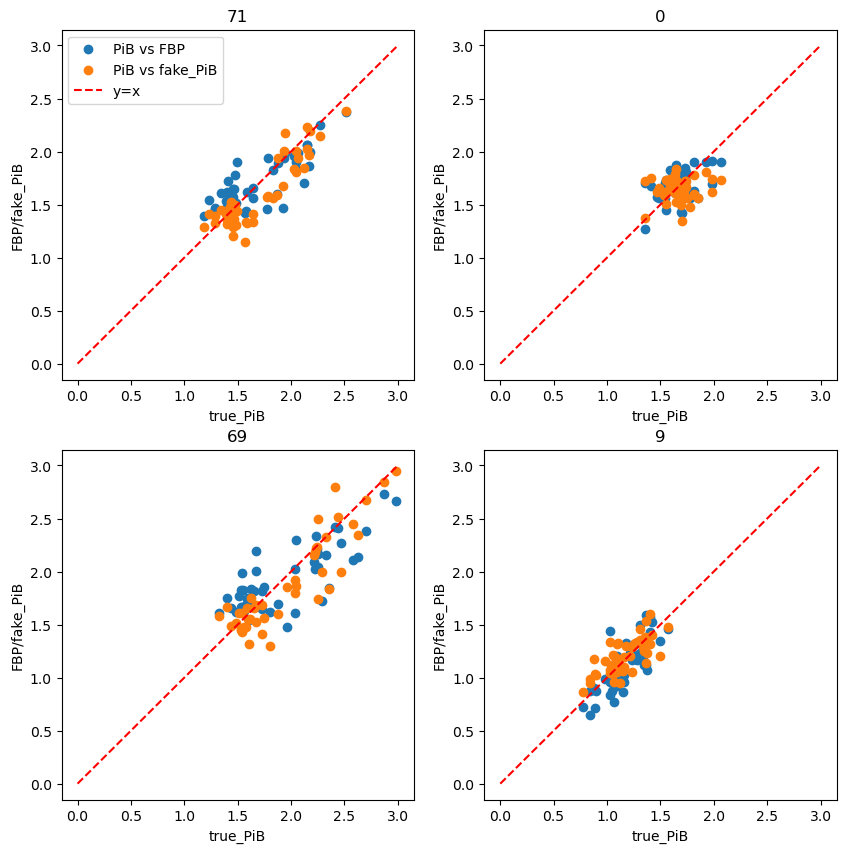

In [17]:
import matplotlib.pyplot as plt

f_i = np.random.randint(0, 85, 5)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i in range(2):
    for j in range(2):
        ax[i, j].scatter(pPiB[:, f_i[i*2+j]], pFBP[:, f_i[i*2+j]], label='PiB vs FBP')
        ax[i, j].scatter(pPiB[:, f_i[i*2+j]], fake_PiB[:, f_i[i*2+j]], label='PiB vs fake_PiB')
        ax[i, j].plot([0, 3], [0, 3], color='red', label='y=x', linestyle='--')
        ax[i, j].set_xlabel('true_PiB')
        ax[i, j].set_ylabel('FBP/fake_PiB')
        ax[i, j].set_title(f_i[i*2+j])
        if i == 0 and j == 0:
            ax[i, j].legend()
# plt.savefig('PiB_vs_FBP_and_PiB_vs_fakePiB_new.png')

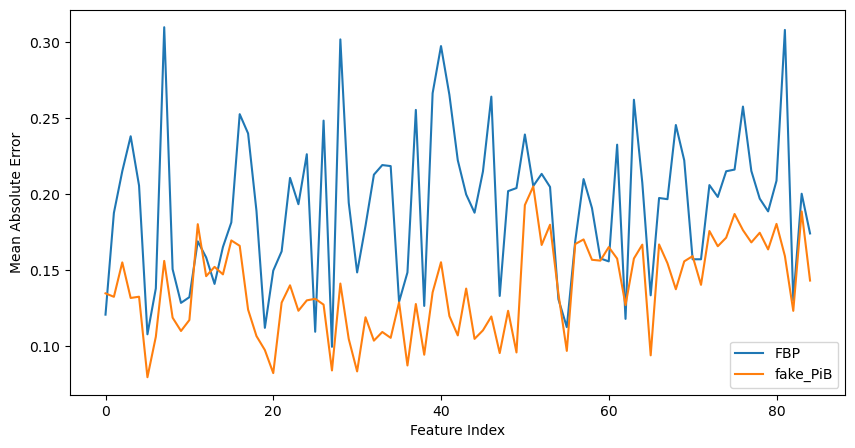

In [18]:
# distance 
dis_fake = np.mean(np.abs(pPiB - fake_PiB), 0)
dis_FBP = np.mean(np.abs(pPiB - pFBP), 0)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(dis_FBP, label='FBP')
ax.plot(dis_fake, label='fake_PiB')
ax.set_xlabel('Feature Index')
ax.set_ylabel('Mean Absolute Error')
ax.legend()
# plt.savefig('PiB_vs_FBP_and_PiB_vs_fakePiB_MAE.png')


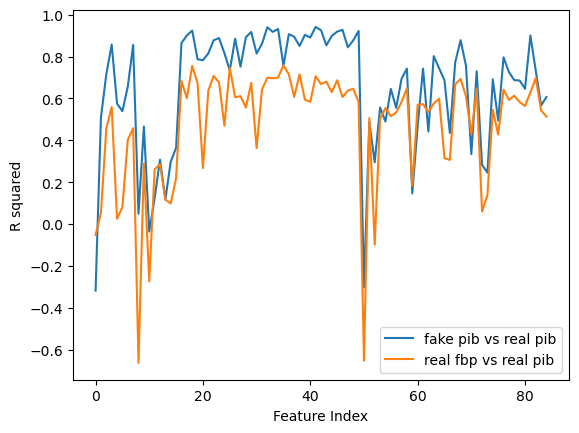

In [19]:
# calculate r squared
from sklearn.metrics import r2_score

fake_R = []
Real_R = []
for i in range(uPiB.shape[1]):
    r2_fake = r2_score(pPiB[:, i], fake_PiB[:, i])
    r2_real = r2_score(pPiB[:, i], pFBP[:, i])
    fake_R.append(r2_fake)
    Real_R.append(r2_real)
    
plt.figure()
plt.plot(fake_R, label='fake pib vs real pib')
plt.plot(Real_R, label='real fbp vs real pib')
plt.xlabel('Feature Index')
plt.ylabel('R squared')
plt.legend()
# plt.savefig('./saved_mis/R_squared_new.png')

In [20]:
fake_PiB_df = pFBP_df.copy()
ID = pFBP_raw['ID']

# add ID
fake_PiB_df['ID'] = ID
fake_PiB_df['ID'] = fake_PiB_df['ID'].astype(str)
# put ID the first column
cols = fake_PiB_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
fake_PiB_df = fake_PiB_df[cols]

fake_PiB_df.iloc[:,1:] = fake_PiB

# # to csv
# fake_PiB_df.to_csv('./fake_PiB_improved2.csv', index=False)


In [21]:
fake_PiB_df.head()

,ID,Cerebellum-White-Matter,Thalamus,Caudate,Putamen,Pallidum,Hippocampus,Amygdala,Accumbens-area,VentralDC,...,wm-rostralanteriorcingulate,wm-rostralmiddlefrontal,wm-superiorfrontal,wm-superiorparietal,wm-superiortemporal,wm-supramarginal,wm-frontalpole,wm-temporalpole,wm-transversetemporal,wm-insula
0,Eld_105858,1.718806,1.901344,1.874958,2.807918,2.529202,1.551107,1.693046,2.651490,1.921744,...,2.352715,3.085953,2.866728,2.435969,2.470741,2.618439,3.012433,1.946989,2.573082,2.489977
1,Eld_106843,1.741705,1.550463,1.352389,1.500656,1.736522,1.279592,1.204033,1.238546,1.640046,...,1.639723,1.693665,1.692244,1.644956,1.546747,1.688729,1.229514,1.304837,1.605601,1.689970
2,Eld_123723,1.679804,1.355289,1.066045,1.278037,1.649169,1.161816,1.124226,0.941945,1.540907,...,1.411649,1.530781,1.465864,1.386082,1.319358,1.401133,1.183379,1.288153,1.309036,1.502379
3,Eld_123950,1.743327,1.741387,1.621304,1.846984,2.065075,1.428575,1.355904,1.761015,1.840820,...,1.983623,2.115554,1.984941,1.772627,1.612572,1.805123,1.881739,1.394952,1.696985,1.900623
4,Eld_130779,1.728276,1.424515,1.040645,1.550527,1.895528,1.204224,1.238943,1.138423,1.673480,...,1.375679,1.619273,1.587665,1.482713,1.437292,1.540278,1.239131,1.321703,1.519093,1.633152


In [22]:
# pd.read_csv('./fake_PiB.csv').head()

# SUVR TEST

In [33]:
from MCSUVR import load_weights, cal_correlation

def cal_MCSUVR(pPiB_raw, fake_PiB_df):
    weight_raw, regions = load_weights()
    region_value_real = {'PREC':[], 'PREF':[], 'TEMP':[], 'GR':[]}
    region_value_fake = {'PREC':[], 'PREF':[], 'TEMP':[], 'GR':[]}

    for ID in weight_raw['ID']:
        id = ID.strip().split('/')[7]
        
        scan_real = pPiB_raw[pPiB_raw['ID'] == id]
        scan_fake = fake_PiB_df[fake_PiB_df['ID'] == id]        
        scan_weight = weight_raw[weight_raw['ID'] == ID]
        
        for key in regions.keys():
            rv_scan_real = 0
            rv_scan_fake = 0
            w = 0
                
            for region in regions[key]:
                w += scan_weight[region].values[0]
                rv_scan_real += scan_real[region].values[0] * scan_weight[region].values[0]
                rv_scan_fake += scan_fake[region].values[0] * scan_weight[region].values[0]
                    
            region_value_real[key].append(rv_scan_real/(w+1e-8))
            region_value_fake[key].append(rv_scan_fake/(w+1e-8))
    
    REAL_MCSUVR = (np.array(region_value_real['PREC']) + np.array(region_value_real['PREF']) + np.array(region_value_real['TEMP']) + np.array(region_value_real['GR'])) / 4
    FAKE_MCSUVR = (np.array(region_value_fake['PREC']) + np.array(region_value_fake['PREF']) + np.array(region_value_fake['TEMP']) + np.array(region_value_fake['GR'])) / 4
    return REAL_MCSUVR, FAKE_MCSUVR

REAL_MCSUVR, FAKE_MCSUVR= cal_MCSUVR(pPiB_raw, fake_PiB_df)
cor = cal_correlation(REAL_MCSUVR, FAKE_MCSUVR)
print(cor)


0.9640509901804161


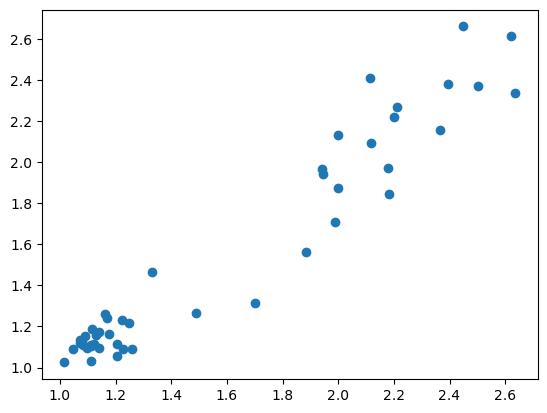

In [24]:
plt.plot(REAL_MCSUVR, FAKE_MCSUVR, 'o')

In [25]:
fake_PiB_df.columns[40], fake_PiB_df.columns[42], fake_PiB_df.columns[43], fake_PiB_df.columns[30], fake_PiB_df.columns[45], fake_PiB_df.columns[27], fake_PiB_df.columns[29]

('ctx-precuneus',
 'ctx-rostralmiddlefrontal',
 'ctx-superiorfrontal',
 'ctx-middletemporal',
 'ctx-superiortemporal',
 'ctx-lateralorbitofrontal',
 'ctx-medialorbitofrontal')

In [38]:
weight_raw, regions = load_weights()

pPiB_np = pPiB_df.to_numpy()
region_to_index = {'ctx-precuneus':39, 'ctx-rostralmiddlefrontal':41, 'ctx-superiorfrontal':42, 'ctx-middletemporal':29, 'ctx-superiortemporal':44, 'ctx-lateralorbitofrontal':26, 'ctx-medialorbitofrontal':28}

def cal_MCSUVR_loss(data):
    # PREC 'ctx-precuneus'
    ctx_precuneus_w = weight_raw['ctx-precuneus'].values
    idx_ctx_precuneus = region_to_index['ctx-precuneus']
    
    # PREF 'ctx-rostralmiddlefrontal', 'ctx-superiorfrontal'
    ctx_rostralmiddlefrontal_w = weight_raw['ctx-rostralmiddlefrontal'].values
    idx_ctx_rostralmiddlefrontal = region_to_index['ctx-rostralmiddlefrontal']
    ctx_superiorfrontal_w = weight_raw['ctx-superiorfrontal'].values
    idx_ctx_superiorfrontal = region_to_index['ctx-superiorfrontal']
    
    # TEMP 'ctx-middletemporal', 'ctx-superiortemporal'
    ctx_middletemporal_w = weight_raw['ctx-middletemporal'].values
    idx_ctx_middletemporal = region_to_index['ctx-middletemporal']
    ctx_superiortemporal_w = weight_raw['ctx-superiortemporal'].values
    idx_ctx_superiortemporal = region_to_index['ctx-superiortemporal']
    
    # GR 'ctx-lateralorbitofrontal', 'ctx-medialorbitofrontal'
    ctx_lateralorbitofrontal_w = weight_raw['ctx-lateralorbitofrontal'].values
    idx_ctx_lateralorbitofrontal = region_to_index['ctx-lateralorbitofrontal']
    ctx_medialorbitofrontal_w = weight_raw['ctx-medialorbitofrontal'].values
    idx_ctx_medialorbitofrontal = region_to_index['ctx-medialorbitofrontal']

    PREC = (ctx_precuneus_w * data[:, idx_ctx_precuneus]) / (ctx_precuneus_w + 1e-8)
    
    PREF = (ctx_rostralmiddlefrontal_w * data[:, idx_ctx_rostralmiddlefrontal]  + ctx_superiorfrontal_w * data[:, idx_ctx_superiorfrontal]) / (ctx_superiorfrontal_w + ctx_rostralmiddlefrontal_w + 1e-8)
    
    TEMP = (ctx_middletemporal_w * data[:, idx_ctx_middletemporal] + ctx_superiortemporal_w * data[:, idx_ctx_superiortemporal]) / (ctx_middletemporal_w + ctx_superiortemporal_w + 1e-8)
    
    GR = (ctx_lateralorbitofrontal_w * data[:, idx_ctx_lateralorbitofrontal] + ctx_medialorbitofrontal_w * data[:, idx_ctx_medialorbitofrontal]) / (ctx_lateralorbitofrontal_w + ctx_medialorbitofrontal_w + 1e-8)
   

    MCSUVR = (PREC + PREF + TEMP + GR) / 4
    return MCSUVR

REAL_MCSUVR = cal_MCSUVR_loss(pPiB_np)
FAKE_MCSUVR = cal_MCSUVR_loss(fake_PiB)
cor = cal_correlation(REAL_MCSUVR, FAKE_MCSUVR)
print(cor)

0.9640509901804161


In [ ]:
# VentralDC ctx-lingual CC_Anterior wm-temporalpole wm-posteriorcingulate ctx-parahippocampal ctx-parsopercularis wm-postcentral ctx-cuneus